## **Saving a model** after training 

In [ ]:
#Saving the model
#K-mean clustering


import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

df = sns.load_dataset("titanic")

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:


#model

from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler

#importing the data in features

X = df[['age', 'fare']]

X.age.fillna(value = X['age'].mean(), inplace=True)

#scaled data

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X) #y nhi liya ku k k-mean me t nhi hota

# perform clustering

model = KMeans (n_clusters=5)

model.fit(X_scaled)  #scale kr k fit kiya

# assign cluster labels to the data

df['cluster']= model.labels_  #model k labels liye



<ipython-input-4-a18d452395e8>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.age.fillna(value = X['age'].mean(), inplace=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df. head() #clusters ko end pr lgaya

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,cluster
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,4
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,3
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0


In [ ]:
df['cluster' ].unique () #unique values dekhi 


array([4, 3, 0, 2, 1], dtype=int32)

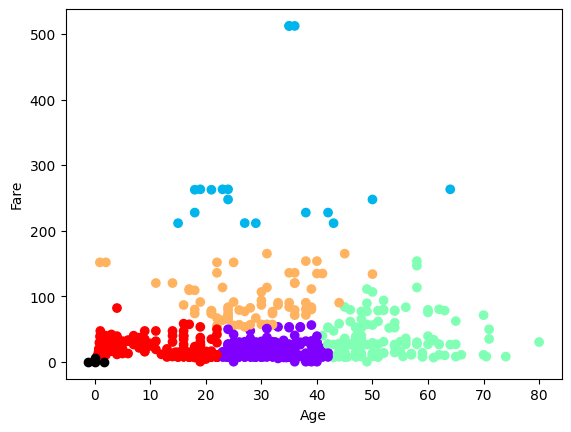

In [ ]:
plt.scatter(df['age'], df['fare'], c=df['cluster'], cmap='rainbow')

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], color='black')

plt.xlabel('Age')

plt.ylabel('Fare')

plt.show()

In [ ]:
import plotly.express as px 
fig =px.scatter(df, x='age', y='fare', color='cluster') 
fig.show()


In [ ]:
import plotly.express as px

fig =px.scatter_3d(df, x='age', y='fare', z='pclass', color='cluster')

fig.show()

In [ ]:
fig = px.parallel_coordinates (df, color='cluster')

fig.show()

In [ ]:
pip install joblib #joblib library k zarye model ko save kry gy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#saving the model

import joblib

joblib.dump(model, 'KMeansClustering.joblib') #eska matlab es basket hy usmy model dump kr rhy hy,model ko kmclustering mw sve kr liya,edr grid search cv ko bhi save kr skty hy


['KMeansClustering.joblib']

In [ ]:
# load the saved model

model_loaded = joblib.load('KMeansClustering.joblib') #model ko save kr k load kiya

In [ ]:
import seaborn as sns

df_1 = sns.load_dataset('tips')

df_1


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
df_1. isnull(). sum() 


total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [ ]:
df_1. info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(df_1['smoker'])

df_1['smoker'] = le.transform(df_1['smoker'])


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df_1['day'])
df_1['day'] = le.transform(df_1['day'])

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(df_1['time'])

df_1['time'] = le.transform (df_1['time'])


In [ ]:
df_1


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,0,2,0,2
1,10.34,1.66,Male,0,2,0,3
2,21.01,3.50,Male,0,2,0,3
3,23.68,3.31,Male,0,2,0,2
4,24.59,3.61,Female,0,2,0,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,0,1,0,3
240,27.18,2.00,Female,1,1,0,2
241,22.67,2.00,Male,1,1,0,2
242,17.82,1.75,Male,0,1,0,2


In [ ]:
X = df_1.drop(columns=['sex'])
y=df_1['sex']

In [ ]:
X.head()


,total_bill,tip,smoker,day,time,size
0,16.99,1.01,0,2,0,2
1,10.34,1.66,0,2,0,3
2,21.01,3.50,0,2,0,3
3,23.68,3.31,0,2,0,2
4,24.59,3.61,0,2,0,4


In [ ]:
joblib.dump(model, "tipswalamodel.joblib")


['tipswalamodel.joblib']

In [ ]:
model_1 = joblib.load('tipswalamodel.joblib')


# **joblib k elawa ickle ko bhi use kr skty hm explain below**

In [ ]:
import pickle #save the model

# Save the model

with open('model.pkl', 'wb') as f:

      pickle.dump(model, f)

#Load the model

with open('model.pkl', 'rb') as f: loaded_model = pickle.load(f)

SyntaxError: ignored

# **For loop**

In [ ]:
##
#For loop
numbers = [1, 2, 3, 4, 5]

for n in numbers:
  print(n)



1
2
3
4
5


In [ ]:
import pandas as pd

import seaborn as sns

data = sns. load_dataset('iris')

for row in data.iterrows():

      print(row)

(0, sepal_length       5.1
sepal_width        3.5
petal_length       1.4
petal_width        0.2
species         setosa
Name: 0, dtype: object)
(1, sepal_length       4.9
sepal_width        3.0
petal_length       1.4
petal_width        0.2
species         setosa
Name: 1, dtype: object)
(2, sepal_length       4.7
sepal_width        3.2
petal_length       1.3
petal_width        0.2
species         setosa
Name: 2, dtype: object)
(3, sepal_length       4.6
sepal_width        3.1
petal_length       1.5
petal_width        0.2
species         setosa
Name: 3, dtype: object)
(4, sepal_length       5.0
sepal_width        3.6
petal_length       1.4
petal_width        0.2
species         setosa
Name: 4, dtype: object)
(5, sepal_length       5.4
sepal_width        3.9
petal_length       1.7
petal_width        0.4
species         setosa
Name: 5, dtype: object)
(6, sepal_length       4.6
sepal_width        3.4
petal_length       1.4
petal_width        0.3
species         setosa
Name: 6, dtype: object)

In [ ]:
##
#For loop
numbers = [1, 2, 3, 4, 5]

for n in numbers:
    if n % 2 == 0: #remainder of a number divided by 2 
          print(f"{n} is even")
else:

          print(f"{n} is odd")

2 is even
4 is even
5 is odd


In [ ]:



##For loops in GridsearchCV

from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets import load_iris

iris = load_iris()

# Define the hyperparameter values to test

param_grid = {

               'n_estimators': [10, 50, 100],

                'max_depth': [None, 5, 10],

                'min_samples_split': [2, 5, 10],

                 'min_samples_leaf':[1, 2, 4]
} 
# Create a random forest classifier

rfc = RandomForestClassifier()

#Perform grid search cross-validation

grid_search= GridSearchCV(rfc, param_grid=param_grid, cv=5) 
grid_search.fit(iris.data, iris.target)

# Print the best hyperparameter values and corresponding accuracy 
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)





Best hyperparameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best accuracy:  0.9666666666666668


# **For loop in grid search cv**

In [ ]:
#second

import pandas as pd

import seaborn as sns

from sklearn.model_selection import cross_val_score
#idhr sary model call kiye

from sklearn. linear_model import LinearRegression

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor

from sklearn.svm import SVR

from sklearn.neighbors import KNeighborsRegressor

#Load the diamonds dataset 
diamonds = sns.load_dataset('diamonds')

# Split the data into features (X) and target (y) tu regreession problem hogi ku k price ko predict krna hy

X = diamonds[['carat', 'color', 'cut', 'depth', 'table','x', 'y', 'z']]

y = diamonds['price']

#label encode categorical features (if any)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['color'] = le.fit_transform(X['color'])

X['cut'] = le.fit_transform(X['cut'])


## Define the models to test
#sary models ko 1 list me rkh liya

models = [

      LinearRegression(),
      DecisionTreeRegressor(), 
      RandomForestRegressor(),
      SVR(),
      KNeighborsRegressor()
         ] 


# Evaluate the models and select the best one

best_model = None #bad me esmy best model ko select kry gy

best_score = float('-inf') # initialize to negative infinity or any small number # koi bhi number a jaye negative ya positive esmy aye

#for loop in action

for model in models:

     # Evaluate the model using 5-fold cross-validation

      scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

      # Compute the mean score and update the best model and score if necessary

      mean_score = scores.mean()
      if mean_score > best_score:
            best_model = model
            best_score = mean_score

#Print the best model and its score

print("Best model:", best_model)

print("Best score:", -best_score) # convert back to positive mean squared error




<ipython-input-47-5cae150c986a>:35: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-47-5cae150c986a>:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Best model: LinearRegression()
Best score: 3272191.451309812


In [ ]:
##
#Here's how to get params of different model with for loop, this will provide multiple dictionaries of params




from sklearn.linear model import LinearRegression, Ridge, Lasso

from sklearn,tree import DecisionTreeRegressor

from sklearn.svm import SVR

from sklearn.ensemble import RandomForestRegressor, Gradient BoostingRegressor

# create a list of the models

models = [LinearRegression(),

Ridge(),

Lasso(),

DecisionTreeRegressor(),

SVR(),

RandomForestRegressor(), Gradient BoostingRegressor()]

#loop through the list of models

for model in models:

# # fit the model

#model.fit(X_train, y_train)

# get the parameters of the model

params = model.get_params()

print the name of the model and its parameters print(type (model).__name_

print(params)



**#Here's how to get params of different model with for loop, this will provide multiple dictionaries of params**

In [ ]:
from sklearn.linear model import LinearRegression, Ridge, Lasso

from sklearn,tree import DecisionTreeRegressor

from sklearn.svm import SVR

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# create a list of the models

models = [LinearRegression(),Ridge(),Lasso(),DecisionTreeRegressor(),SVR(),RandomForestRegressor(), Gradient BoostingRegressor()]

#loop through the list of models

for model in models:

## fit the model

#model.fit(X_train, y_train)

# get the parameters of the model

params = model.get_params()

print the name of the model and its parameters print(type (model).__name_

print(params)
